In [1]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

%matplotlib inline
import numpy as np
import os
import pandas as pd
import sys
from astropy.coordinates import SkyCoord
from astropy.io import ascii
from IPython.display import display
from itertools import count
from matplotlib import pyplot as plt, ticker
# Python 3 compatibility when checking strings
if sys.version_info[0] == 2:
    str_types = (str, unicode)
else:
    str_types = str

from kids_ggl_pipeline.halomodel import nfw

# my code
from plottools import plotutils
plotutils.update_rcParams()

In [2]:
sim = 'RefL0100N1504'
snapshot = 26

plot_path = os.path.join('..', 'plots', sim, 'snapshot{0}'.format(snapshot))
if not os.path.isdir(plot_path):
    os.makedirs(plot_path)

In [3]:
path = os.path.join('..', '..', 'data', sim, 'snapshot{0}'.format(snapshot))
group = ascii.read(os.path.join(path, 'groups.txt'))
cent = ascii.read(os.path.join(path, 'centrals.txt'))
sat = ascii.read(os.path.join(path, 'satellites.txt'))
history = ascii.read(os.path.join(path, 'history.txt'))
group = pd.DataFrame(data=group.columns, columns=group.colnames)
cent = pd.DataFrame(data=cent.columns, columns=cent.colnames)
sat = pd.DataFrame(data=sat.columns, columns=sat.colnames)
history = pd.DataFrame(data=history.columns, columns=history.colnames)
print(group['x'].size, 'Groups:', group.columns)
print(cent['x'].size, 'Centrals:', cent.columns)
print(sat['x'].size, 'Satellites:', sat.columns)
display(group[:10])

12144 Groups: Index(['GroupID', 'x', 'y', 'z', 'M', 'M200c', 'M500c', 'M200m', 'R200c',
       'R500c', 'R200m', 'Nsub'],
      dtype='object')
7755 Centrals: Index(['GalaxyID', 'GroupID', 'xm', 'ym', 'zm', 'x', 'y', 'z', 'rhalf_DM',
       'rhalf_gas', 'rhalf_star', 'rphalf_DM', 'rphalf_gas', 'rphalf_star',
       'M', 'M_DM', 'Mstar', 'sfr', 'vx', 'vy', 'vz', 'vmax', 'r_vmax'],
      dtype='object')
5810 Satellites: Index(['GalaxyID', 'GroupID', 'xm', 'ym', 'zm', 'x', 'y', 'z', 'rhalf_DM',
       'rhalf_gas', 'rhalf_star', 'rphalf_DM', 'rphalf_gas', 'rphalf_star',
       'M', 'M_DM', 'Mstar', 'sfr', 'vx', 'vy', 'vz', 'vmax', 'r_vmax'],
      dtype='object')


,GroupID,x,y,z,M,M200c,M500c,M200m,R200c,R500c,R200m,Nsub
0,26000000000000,5.972742,75.567480,47.195652,4.652437e+14,3.318170e+14,2.562827e+14,3.974664e+14,1372.81340,928.07294,1942.3695,13778
1,26000000000001,18.708490,79.925210,54.138893,3.307497e+14,1.640183e+14,1.121906e+14,2.302421e+14,1085.45480,704.68950,1619.1412,9913
2,26000000000002,9.299732,35.015594,54.273197,3.145896e+14,2.626136e+14,1.943604e+14,3.246303e+14,1269.85800,846.32230,1815.5967,9315
3,26000000000003,52.289433,5.008444,20.171661,2.870586e+14,2.609669e+14,2.032776e+14,3.166482e+14,1267.19630,859.08563,1800.6168,7672
4,26000000000004,10.763284,81.740005,55.315815,2.356129e+14,1.877413e+14,1.289096e+14,2.526609e+14,1135.46950,738.09283,1670.0746,6888
5,26000000000005,77.636696,76.473850,41.852844,2.076781e+14,1.006561e+14,7.566555e+13,1.165533e+14,922.43100,617.97350,1290.4421,6903
6,26000000000006,75.868004,89.177760,41.862904,2.033329e+14,1.372079e+14,9.303660e+13,1.668726e+14,1022.81000,662.03690,1454.4614,5697
7,26000000000007,61.776466,33.598824,19.790958,1.214419e+14,4.835496e+13,3.006390e+13,7.664262e+13,722.44135,454.31085,1122.1727,4267
8,26000000000008,84.777565,47.120064,8.229006,1.121182e+14,9.996877e+13,7.716244e+13,1.274512e+14,920.30810,622.02910,1329.5000,3167
9,26000000000009,88.179230,50.473312,4.353087,1.059367e+14,8.665644e+13,5.986910e+13,1.143981e+14,877.52020,571.58670,1282.4464,3473


## Plot mass functions as-they-are

In [4]:
fig, ax = plt.subplots(figsize=(8,7))
bins = np.logspace(8.5, 15, 42)
# groups
#ax = axes[0]
ax.hist(group['M200c'], bins, histtype='step', lw=3, color='k', bottom=1,
        label='FoF groups')
ax.set_xlabel('$M_{200c}$ (M$_\odot$)')
# galaxies
#ax = axes[1]
for sample, name in zip((cent, sat), ('Centrals', 'Satellites')):
    ax.hist(sample['M'], bins, histtype='step', bottom=1,
            lw=3, label=name)
ax.set_xlabel('$M$ (M$_\odot$)')
#for ax in axes:
# dummy
for i in (1,):
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(1, 5e3)
    ax.legend(loc='best')
    ax.set_ylabel('$1+N(M)$')
    ax.xaxis.set_major_locator(ticker.LogLocator(base=10,numticks=7))
    ax.xaxis.set_minor_locator(ticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1), numticks=7))

plotutils.savefig(os.path.join(plot_path, 'massfunction.pdf'), fig=fig)

Saved  to ../plots/RefL0100N1504/snapshot26/massfunction.pdf


## Match satellites (and centrals) to their respective group

In [5]:
satgr = pd.merge(sat, group, on='GroupID', suffixes=('_sat', '_host'), how='left')
# 3d distance
satgr['dist_host'] = np.sum(
    (sat[['x','y','z']].values - satgr[['x_host','y_host','z_host']].values)**2,
    axis=1)**0.5
centgr = pd.merge(cent, group, on='GroupID', suffixes=('_cent', '_host'), how='left')
display(centgr[:10])

def find_nearest(gal, gr, merged=None, xy=''):
    """
    `xy=''` is equivalent to `xy='xyz'` (i.e., 3d distances)
    but will result in nicer labels (just "dist" instead of "xyzdist")
    """
    if not isinstance(xy, str):
        xy = ''.join(xy)
    if not xy:
        dist2 = np.sum((gal[['x','y','z']].values[:,np.newaxis] - gr[['x','y','z']].values)**2, axis=2)
    else:
        dist2 = np.sum((gal[list(xy)].values[:,np.newaxis] - gr[list(xy)].values)**2, axis=2)
    nearest = np.argmin(dist2, axis=1)
    if merged is None:
        merged = gal
    merged['{0}Nearest_idx'.format(xy)] = np.arange(gr.GroupID.size, dtype=int)[nearest]
    merged['{0}Nearest_ID'.format(xy)] = np.array(gr.GroupID)[nearest]
    merged['{0}Nearest_dist'.format(xy)] = np.min(dist2, axis=1)**0.5
    return merged

cent_nearest = find_nearest(cent, group)
print('cent_nearest:')
display(cent_nearest[:10])

# 3d distance to nearest
satgr = find_nearest(sat, group, satgr, '')
# 2d distances to host and nearest
for xy in [['x','y'], ['x','z'], ['y','z']]:
    satgr = find_nearest(sat, group, satgr, xy)
    satgr['{0}dist_host'.format(''.join(xy))] = np.sum(
        (sat[xy].values - satgr[['{0}_host'.format(xy[0]),'{0}_host'.format(xy[1])]].values)**2,
        axis=1)**0.5
    
display(satgr[:10])

,GalaxyID,GroupID,xm,ym,zm,x_cent,y_cent,z_cent,rhalf_DM,rhalf_gas,...,y_host,z_host,M_host,M200c,M500c,M200m,R200c,R500c,R200m,Nsub
0,47681,26000000004706,7.926265,82.412620,56.205410,7.926164,82.412050,56.206936,30.990000,11.367657,...,82.412050,56.206936,2.820693e+11,2.011227e+11,1.663520e+11,2.671280e+11,116.179620,80.357346,170.14174,7.0
1,48094,26000000003441,20.711971,79.134995,53.254486,20.706180,79.136020,53.249050,53.012180,70.987610,...,79.136020,53.249050,4.245247e+11,2.620848e+11,1.930298e+11,3.231484e+11,126.899500,84.437190,181.28412,16.0
2,53605,26000000006034,15.637856,80.353730,53.106300,15.637446,80.352510,53.107452,30.617273,19.934559,...,80.352510,53.107452,1.842991e+11,1.482012e+11,1.294872e+11,1.745879e+11,104.936200,73.916820,147.64793,5.0
3,55735,26000000004522,17.775414,78.390045,54.464943,17.779785,78.387560,54.465120,40.050674,4.818975,...,78.387550,54.465120,2.392073e+11,1.606821e+11,1.179187e+11,2.460558e+11,107.801320,71.645570,165.54315,19.0
4,62450,26000100001103,14.985726,80.179850,50.979790,14.986866,80.178030,50.977577,40.339268,6.441914,...,80.178030,50.977577,1.442603e+11,1.331343e+11,1.049184e+11,1.592913e+11,101.252780,68.913070,143.20860,8.0
5,63432,26000000004760,20.038681,78.641470,52.615970,20.037958,78.641410,52.616833,40.430798,3.939164,...,78.641410,52.616833,3.098230e+11,2.288184e+11,1.853363e+11,2.752854e+11,121.284650,83.302810,171.84984,17.0
6,64988,26000100000087,12.937562,81.420760,54.255272,12.936369,81.421820,54.253094,24.806034,0.000000,...,81.421820,54.253094,1.601964e+11,1.184053e+11,9.892053e+10,1.676014e+11,97.372780,67.574326,145.65817,7.0
7,66591,26000100002864,8.464085,81.250960,56.244625,8.463855,81.250680,56.244260,19.657255,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,69314,26000100002221,13.853775,81.223130,56.858482,13.854639,81.220024,56.857870,24.565355,2.364759,...,81.220024,56.857864,1.127216e+11,9.499678e+10,7.966647e+10,1.275059e+11,90.477425,62.869965,132.96739,5.0
9,69845,26000100000133,9.154927,82.793910,57.595615,9.152954,82.795490,57.595780,37.744686,2.879714,...,82.795490,57.595780,1.589279e+11,1.451453e+11,1.201260e+11,1.737010e+11,104.211880,72.092810,147.40262,4.0


cent_nearest:


,GalaxyID,GroupID,xm,ym,zm,x,y,z,rhalf_DM,rhalf_gas,...,Mstar,sfr,vx,vy,vz,vmax,r_vmax,Nearest_idx,Nearest_ID,Nearest_dist
0,47681,26000000004706,7.926265,82.412620,56.205410,7.926164,82.412050,56.206936,30.990000,11.367657,...,5.103684e+09,0.308155,734.790900,-648.092600,-530.76010,123.767654,14.397245,4705,26000000004706,0.000000e+00
1,48094,26000000003441,20.711971,79.134995,53.254486,20.706180,79.136020,53.249050,53.012180,70.987610,...,3.974296e+09,0.224028,-1018.906000,196.054920,109.77600,115.052765,11.759777,3441,26000000003441,0.000000e+00
2,53605,26000000006034,15.637856,80.353730,53.106300,15.637446,80.352510,53.107452,30.617273,19.934559,...,5.588092e+09,0.443948,-403.532230,-420.028320,203.41757,109.733340,12.586855,6031,26000000006034,1.000000e-06
3,55735,26000000004522,17.775414,78.390045,54.464943,17.779785,78.387560,54.465120,40.050674,4.818975,...,3.280692e+09,0.453195,-917.044430,475.687870,345.46255,91.839480,15.178546,4521,26000000004522,1.000000e-05
4,62450,26000100001103,14.985726,80.179850,50.979790,14.986866,80.178030,50.977577,40.339268,6.441914,...,1.459735e+09,0.154714,-190.360600,-306.990420,384.26960,88.161606,20.075340,8804,26000100001103,0.000000e+00
5,63432,26000000004760,20.038681,78.641470,52.615970,20.037958,78.641410,52.616833,40.430798,3.939164,...,3.506658e+09,0.281347,-1014.587600,321.840450,-131.33235,110.369190,15.115102,4759,26000000004760,2.000000e-06
6,64988,26000100000087,12.937562,81.420760,54.255272,12.936369,81.421820,54.253094,24.806034,0.000000,...,1.928145e+09,0.000000,16.317135,-88.891365,-409.05872,99.410800,16.708523,7823,26000100000087,1.000000e-06
7,66591,26000100002864,8.464085,81.250960,56.244625,8.463855,81.250680,56.244260,19.657255,0.000000,...,7.042988e+09,0.000000,281.258200,56.155125,-450.94992,96.644540,12.274827,4705,26000000004706,1.280346e+00
8,69314,26000100002221,13.853775,81.223130,56.858482,13.854639,81.220024,56.857870,24.565355,2.364759,...,2.609904e+09,0.120531,-247.421720,-374.861000,-1029.93440,93.707310,15.245285,9849,26000100002221,6.000000e-06
9,69845,26000100000133,9.154927,82.793910,57.595615,9.152954,82.795490,57.595780,37.744686,2.879714,...,3.133801e+09,0.251360,822.730800,-686.770400,-765.86670,100.583420,10.958036,7866,26000100000133,0.000000e+00


,GalaxyID,GroupID,xm,ym,zm,x_sat,y_sat,z_sat,rhalf_DM,rhalf_gas,...,xyNearest_dist,xydist_host,xzNearest_idx,xzNearest_ID,xzNearest_dist,xzdist_host,yzNearest_idx,yzNearest_ID,yzNearest_dist,yzdist_host
0,3,26000000000004,10.676504,81.724070,55.323150,10.676117,81.723870,55.323174,8.904130,0.000000,...,0.088648,0.088648,4,26000000000004,0.087477,0.087477,4,26000000000004,0.017734,0.017734
1,13633,26000000000001,18.766990,79.880360,54.251564,18.766426,79.879480,54.251694,11.086453,0.000000,...,0.073809,0.073809,1,26000000000001,0.126809,0.126809,1,26000000000001,0.121718,0.121718
2,21795,26000000000004,10.640868,81.904700,55.391033,10.640938,81.904915,55.391296,8.631454,0.000000,...,0.205338,0.205338,4,26000000000004,0.143756,0.143756,10773,26000100003252,0.078064,0.181363
3,23303,26000000000004,10.720372,82.034325,55.440050,10.720102,82.035590,55.440372,13.246635,0.000000,...,0.298723,0.298723,4,26000000000004,0.131830,0.131830,10773,26000100003252,0.104941,0.320757
4,24474,26000000000004,10.720508,82.035150,55.439865,10.720475,82.035126,55.439842,0.000000,0.000000,...,0.298210,0.298210,4,26000000000004,0.131207,0.131207,10773,26000100003252,0.104240,0.320124
5,24479,26000000000001,17.905313,80.044450,53.676780,17.904818,80.044100,53.676167,16.616331,0.000000,...,0.446977,0.812418,4521,26000000004522,0.798799,0.927364,7190,26000000007201,0.187755,0.477755
6,26265,26000000000001,18.668016,79.865140,54.033566,18.667889,79.865000,54.033524,5.794720,0.000000,...,0.072620,0.072620,1,26000000000001,0.112921,0.112921,9016,26000100001331,0.032494,0.121358
7,27475,26000000000004,10.636128,81.933426,55.166782,10.636000,81.933440,55.166645,9.988746,0.000000,...,0.231556,0.231556,4,26000000000004,0.196094,0.196094,9765,26000100002129,0.059539,0.244272
8,28852,26000000000001,18.529860,80.159240,54.326656,18.529095,80.159780,54.326714,10.728441,0.000000,...,0.261690,0.295306,1,26000000000001,0.259729,0.259729,997,26000000000547,0.130675,0.300499
9,29819,26000000000004,12.315205,80.951805,55.128260,12.315942,80.956650,55.132570,25.242516,1.304345,...,0.468781,1.739078,8757,26000100001054,0.528399,1.563434,6303,26000000006306,0.288117,0.804502


Projection effects result in some cases in the host group not being the nearest group.

*It's not always projection effects.

#### As an example, the most massive cluster:

,GalaxyID,GroupID,xm,ym,zm,x_sat,y_sat,z_sat,rhalf_DM,rhalf_gas,...,xyNearest_dist,xydist_host,xzNearest_idx,xzNearest_ID,xzNearest_dist,xzdist_host,yzNearest_idx,yzNearest_ID,yzNearest_dist,yzdist_host
1,13633,26000000000001,18.766990,79.880360,54.251564,18.766426,79.879480,54.251694,11.086453,0.000000,...,0.073809,0.073809,1,26000000000001,0.126809,0.126809,1,26000000000001,0.121718,0.121718
5,24479,26000000000001,17.905313,80.044450,53.676780,17.904818,80.044100,53.676167,16.616331,0.000000,...,0.446977,0.812418,4521,26000000004522,0.798799,0.927364,7190,26000000007201,0.187755,0.477755
6,26265,26000000000001,18.668016,79.865140,54.033566,18.667889,79.865000,54.033524,5.794720,0.000000,...,0.072620,0.072620,1,26000000000001,0.112921,0.112921,9016,26000100001331,0.032494,0.121358
8,28852,26000000000001,18.529860,80.159240,54.326656,18.529095,80.159780,54.326714,10.728441,0.000000,...,0.261690,0.295306,1,26000000000001,0.259729,0.259729,997,26000000000547,0.130675,0.300499
10,30904,26000000000001,19.267372,79.736115,52.965157,19.265656,79.736374,52.965670,22.768785,0.000000,...,0.082979,0.588297,11277,26000100003853,0.170259,1.298802,8172,26000100000447,0.233684,1.188323
11,32368,26000000000001,19.243954,80.203070,52.711636,19.242620,80.202380,52.712185,23.673235,1.363582,...,0.394743,0.601762,11277,26000100003853,0.401189,1.523414,11906,26000100004761,0.278948,1.453382
12,33117,26000000000001,18.568920,80.856680,53.063164,18.568417,80.857570,53.063190,19.184624,3.636787,...,0.408857,0.942823,8750,26000100001047,0.702877,1.084784,2944,26000000002944,0.387535,1.423528
14,34158,26000000000001,18.792221,80.151665,53.991226,18.792078,80.151760,53.991146,7.140998,0.000000,...,0.241478,0.241478,1,26000000000001,0.169753,0.169753,7298,26000000007309,0.057585,0.270470
15,35659,26000000000001,17.671537,79.658640,53.000507,17.671133,79.658290,53.000504,13.149221,0.000000,...,0.340966,1.071147,6024,26000000006027,1.022192,1.540143,8172,26000100000447,0.317569,1.169263
16,36470,26000000000001,17.013485,78.562410,53.310310,17.013592,78.563190,53.310898,21.430124,0.000000,...,0.527261,2.174345,10789,26000100003270,0.578826,1.886334,2382,26000000002421,0.035464,1.593949


Group 26000000000001 contains 152 massive satellites
Its central subhalo is # 21109762.
134 satellites are closer to some other group in xy projection, belonging to 97 different groups
132 satellites are closer to some other group in xz projection, belonging to 95 different groups
147 satellites are closer to some other group in yz projection, belonging to 111 different groups


/Users/cristobal/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


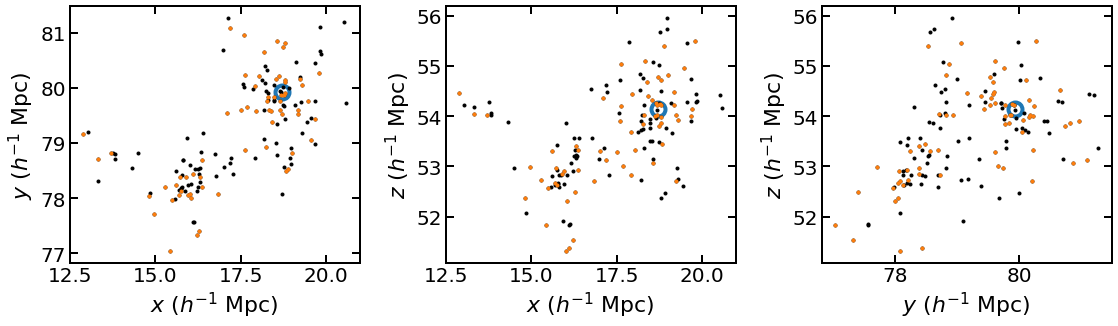

In [6]:
fig, axes = plt.subplots(figsize=(16,5), ncols=3)
example = 26000000000001
jgr = (group['GroupID'] == example)
j = (satgr['GroupID'] == example)
display(satgr[j][:10])
print('Group {0} contains {1} massive satellites'.format(example, j.sum()))
members = satgr[j]
example_cent = cent['GalaxyID'][cent['GroupID'] == example].values[0]
print('Its central subhalo is # {0}.'.format(example_cent))

projections = ('xy', 'xz', 'yz')
for ax, proj in zip(axes, projections):
    ax.plot(group[proj[0]][jgr], group[proj[1]][jgr], 'C0o', mfc='none', mew=4, ms=14)
    nearcol = '{0}Nearest_ID'.format(proj)
    ax.plot(sat[proj[0]][j], sat[proj[1]][j], 'k.')
    # satellites which are closer in projection to some other group
    ambiguous = np.array([i for i, nearest, host
                          in zip(count(), satgr[nearcol][j], satgr['GroupID'][j])
                          if nearest != host])
    print('{0} satellites are closer to some other group in {1} projection,'
          ' belonging to {2} different groups'.format(
                ambiguous.size, proj, np.unique(satgr[nearcol][j][ambiguous]).size))
    ax.plot(sat[proj[0]][j][ambiguous], sat[proj[1]][j][ambiguous], 'C1.')
    # other FoF groups in the vicinity
    close = (np.sum(group))
    ax.set_xlabel('${0}$ ($h^{{-1}}$ Mpc)'.format(proj[0]))
    ax.set_ylabel('${0}$ ($h^{{-1}}$ Mpc)'.format(proj[1]))

fig.tight_layout()

In addition, some satellites are hosted by groups less massive than the cut I applied to the downloaded catalog
(namely, $M_{200m}>10^{11}\,h^{-1}\mathrm{M}_\odot$):

In [7]:
inmassive = np.isfinite(satgr['{0}{1}dist_host'.format(*xy)])
print('{0}/{1} satellites in massive groups'.format(inmassive.sum(), inmassive.size))
print('GroupID:', sat['GroupID'][~inmassive].values[0])
print('(x,y)_group:', satgr['x_host'][~inmassive].values[0],
      satgr['y_host'][~inmassive].values[0])
print('Entry in Group table:')
display(group[group['GroupID'] == 26000000003580])

5809/5810 satellites in massive groups
GroupID: 26000000003580
(x,y)_group: nan nan
Entry in Group table:


,GroupID,x,y,z,M,M200c,M500c,M200m,R200c,R500c,R200m,Nsub


These will be counted as not having been in a cluster previously

### Now match all galaxies to their nearest *cluster*

In [8]:
Mcl_min = 2e13
cl = (group['M200m'] > Mcl_min)
print('There are {0} clusters with M > {1:.1e} Msun/h'.format(
        cl.sum(), Mcl_min))

cluster = group[cl]

gal = pd.concat([cent, sat])
galcl = find_nearest(gal, cluster)
for xy in ('xy','xz','yz'):
    galcl = find_nearest(gal, cluster, galcl, xy)
display(galcl[:10])

There are 88 clusters with M > 2.0e+13 Msun/h


,GalaxyID,GroupID,M,M_DM,Mstar,Nearest_ID,Nearest_dist,Nearest_idx,r_vmax,rhalf_DM,...,zm,xyNearest_idx,xyNearest_ID,xyNearest_dist,xzNearest_idx,xzNearest_ID,xzNearest_dist,yzNearest_idx,yzNearest_ID,yzNearest_dist
0,47681,26000000004706,1.877593e+11,1.808514e+11,5.103684e+09,26000000000004,3.048769,4,14.397245,30.990000,...,56.205410,4,26000000000004,2.915629,2,26000000000002,2.371927,4,26000000000004,1.116128
1,48094,26000000003441,2.682974e+11,2.605350e+11,3.974296e+09,26000000000001,2.324953,1,11.759777,53.012180,...,53.254486,29,26000000000029,2.116725,1,26000000000001,2.186912,1,26000000000001,1.189387
2,53605,26000000006034,1.441719e+11,1.318138e+11,5.588092e+09,26000000000001,3.267685,1,12.586855,30.617273,...,53.106300,74,26000000000077,2.600420,1,26000000000001,3.239627,1,26000000000001,1.116448
3,55735,26000000004522,1.406660e+11,1.358276e+11,3.280692e+09,26000000000001,1.825728,1,15.178546,40.050674,...,54.464943,74,26000000000077,0.494085,1,26000000000001,0.984336,1,26000000000001,1.571875
4,62450,26000100001103,1.354401e+11,1.332972e+11,1.459735e+09,26000000000017,3.346736,17,20.075340,40.339268,...,50.979790,17,26000000000017,2.709377,17,26000000000017,2.177468,29,26000000000029,2.375430
5,63432,26000000004760,2.137507e+11,2.093548e+11,3.506658e+09,26000000000001,2.394221,1,15.115102,40.430798,...,52.615970,1,26000000000001,1.848142,1,26000000000001,2.020928,1,26000000000001,1.991183
6,64988,26000100000087,1.063492e+11,1.044156e+11,1.928145e+09,26000000000004,2.439860,4,16.708523,24.806034,...,54.255272,4,26000000000004,2.196256,4,26000000000004,2.419023,4,26000000000004,1.109332
7,66591,26000100002864,7.347705e+10,6.643046e+10,7.042988e+09,26000000000004,2.527612,4,12.274827,19.657255,...,56.244625,4,26000000000004,2.350917,2,26000000000002,2.140976,4,26000000000004,1.049499
8,69314,26000100002221,8.826914e+10,8.532610e+10,2.609904e+09,26000000000004,3.493535,4,15.245285,24.565355,...,56.858482,4,26000000000004,3.134782,52,26000000000053,2.818530,86,26000000000094,0.759815
9,69845,26000100000133,1.474817e+11,1.435933e+11,3.133801e+09,26000000000004,2.984200,4,10.958036,37.744686,...,57.595615,4,26000000000004,1.925412,4,26000000000004,2.791308,86,26000000000094,0.987744


Migh need to include indices in these merged tables to more easily cross-match the tables (for instance, when binning by cluster-centric distance and cluster mass)

## Plot the radial distribution of satellites in bins of group mass

1
1
1


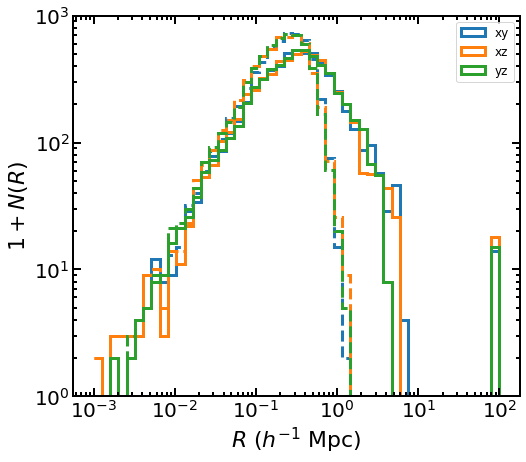

In [9]:
bins = np.logspace(-3, 2, 50)
xo = (bins[:-1]+bins[1:]) / 2
fig, ax = plt.subplots(figsize=(8,7))
for i, proj in enumerate(projections):
    print(np.isnan(satgr['{0}dist_host'.format(proj)]).sum())
    ax.hist(satgr['{0}dist_host'.format(proj)][inmassive], bins, color='C{0}'.format(i),
            histtype='step', lw=3, bottom=1, label=proj)
    ax.hist(satgr['{0}Nearest_dist'.format(proj)], bins, color='C{0}'.format(i),
            histtype='step', lw=3, ls='dashed', bottom=1, label='_none_')
# add NFW
rs = 50
sigma_s = 9e12
ynfw = nfw.sigma(xo/rs, sigma_s)
#ax.plot(xo, ynfw, 'k-', label='$\Sigma_\mathrm{{NFW}}$ ($r_\mathrm{{s}}={}$ $h^{{-1}}$ Mpc)'.format(rs))

ax.set_ylim(1, 1e3)
ax.set_xlabel('$R$ ($h^{-1}$ Mpc)')
ax.set_ylabel('$1+N(R)$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='upper right', fontsize=12)

It makes sense that the "Nearest" histograms (dashed) show a distribution towards smaller values than the "Host" histograms (solid).

### First, the total-to-stellar mass relation of central galaxies

In [10]:
mstarbins = np.logspace(9, 13, 16)
mstar = (mstarbins[:-1]+mstarbins[1:]) / 2
ccut = pd.cut(centgr.Mstar, mstarbins)
cbinned = centgr.groupby(ccut)
m200m = cbinned.M200m.mean().values
m200m_lo = cbinned.M200m.quantile(0.16).values
m200m_hi = cbinned.M200m.quantile(0.84).values
cgood = np.isfinite(m200m)
print(cbinned.size().values)
print(m200m)

[1977 1604 1163  903  785  568  386  224   94   38    7    5    1    0    0]
[  2.09668653e+11   2.87552271e+11   4.16350350e+11   6.41435632e+11
   1.05241285e+12   1.91816292e+12   3.81839088e+12   8.17654171e+12
   2.00005522e+13   4.52317386e+13   9.61214461e+13   2.58210837e+14
   3.97466441e+14              nan              nan]


### Now of all satellites

In [11]:
scut = pd.cut(satgr.Mstar, mstarbins)
sbinned = satgr.groupby(scut)
msub = sbinned.M_sat.mean().values
msub_lo = sbinned.M_sat.quantile(0.16).values
msub_hi = sbinned.M_sat.quantile(0.84).values
sgood = np.isfinite(msub)
print(sbinned.size().values)
print(msub)

[1643 1261  982  716  526  391  190   70   23    4    4    0    0    0    0]
[  4.69608727e+10   6.76504593e+10   9.80567242e+10   1.46745217e+11
   2.54108104e+11   4.07869703e+11   9.34290276e+11   2.25420460e+12
   4.79366941e+12   1.40888193e+13   5.27833669e+13              nan
              nan              nan              nan]


### Now of satellites binned by (3d) distance to host group/cluster

In [12]:
Rbins = np.array([0.01, 0.3, 0.5, 1, 2, 5, 10, 20])
R = (Rbins[:-1]+Rbins[1:]) / 2
# Note that cluster sizes are given in pkpc
sRbinned = satgr.groupby([scut, pd.cut(1000*satgr.dist_host/satgr.R200m, Rbins)])
#print(satgr.dist_host/satgr.R200m)
msub_R = sRbinned.mean().M_sat.values.reshape((mstar.size,R.size))
#print(msub_R)

### Now of all galaxies binned by distance to nearest massive cluster

In [13]:
print(galcl.columns)
clbinned = galcl.groupby([pd.cut(galcl.Mstar, mstarbins),
                          pd.cut(galcl.Nearest_dist, Rbins)])
msub_cl = clbinned.mean().M.values.reshape((mstar.size,R.size))

Index(['GalaxyID', 'GroupID', 'M', 'M_DM', 'Mstar', 'Nearest_ID',
       'Nearest_dist', 'Nearest_idx', 'r_vmax', 'rhalf_DM', 'rhalf_gas',
       'rhalf_star', 'rphalf_DM', 'rphalf_gas', 'rphalf_star', 'sfr', 'vmax',
       'vx', 'vy', 'vz', 'x', 'xm', 'y', 'ym', 'z', 'zm', 'xyNearest_idx',
       'xyNearest_ID', 'xyNearest_dist', 'xzNearest_idx', 'xzNearest_ID',
       'xzNearest_dist', 'yzNearest_idx', 'yzNearest_ID', 'yzNearest_dist'],
      dtype='object')


In [44]:
fig, ax = plt.subplots(figsize=(8,7))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$m_\star\,(h^{-1}\,\mathrm{M}_\odot$)')
#ax.set_ylabel('$M_{200m}\,(h^{-1}\,\mathrm{M}_\odot$)')
ax.set_ylabel(r'$M_\mathrm{tot}\,(h^{-1}\,\mathrm{M}_\odot)$')

# centrals
ax.plot(mstar, m200m, 'k-', lw=1.5,
        label='Centrals ($M_\mathrm{tot}=M_{200m}$)')
ax.fill_between(mstar[cgood], m200m_lo[cgood], m200m_hi[cgood],
                color='k', alpha=0.3, zorder=-1)
# all satellites
satcolor = '0.6'
ax.plot(mstar, msub, '-', color=satcolor, lw=1.5,
        label='All satellites ($M_\mathrm{tot}=m_\mathrm{sub}$)')
ax.fill_between(mstar[sgood], msub_lo[sgood], msub_hi[sgood],
                color=satcolor, alpha=0.3, zorder=-1)
# satellites binned by distance to the centre
lines = []
colors, colorbar = plotutils.colorscale(
    n=R.size+1, vmin=R[0], vmax=R[-1], cmap='plasma')
for i in range(R.size):
    # in all groups
    ax.plot(mstar, msub_R[:,i], dashes=(8,2), color=colors[i], lw=2,
            label='{0} $<$ $R/R_{{200m}}$ $<$ {1}'.format(Rbins[i],Rbins[i+1]))
    # around massive groups
    ax.plot(mstar, msub_cl[:,i], '-', color=colors[i], lw=2,
            label='_none_')
    if i == 0:
        lines.append(ax.plot([], [], 'k', dashes=(8,2), lw=2)[0])
        lines.append(ax.plot([], [], 'k-')[0])
    ax.plot()


leg = ax.legend(loc='upper left', fontsize=13)
ax.legend(lines,
          ('Satellites of all groups', 'Galaxies around massive groups'),
          loc='lower right', fontsize=13)
plt.gca().add_artist(leg)
plotutils.savefig(os.path.join(plot_path, 'total_to_stellar_groups_and_clusters.pdf'))

Saved  to ../plots/RefL0100N1504/snapshot26/total_to_stellar_groups_and_clusters.pdf


Distances in the plot above are 3-dimensional. A quick look at binning by projected distance shows that differences between bins are somewhat reduced (as expected).

I don't think dashed and dotted lines should be terribly correlated because the vast majority of groups are less massive than my "clusters"

###  Next step: relation as a function of distance from the nearest massive (e.g., $M>10^{13}\,h^{-1}\,\mathrm{M}_\odot$) group.
Note: will probably need to use comoving coordinates.